# Robot Long Jump
MARCH 2023 : PUZZLE

Great news! The variety of robotic competition continues to grow at breakneck pace! Most recently, head-to-head long jump contests have been all the rage.

These contests consist of rounds in which each robot has a single attempt to score. In an attempt, a robot speeds down the running track (modeled as the numberline) from 0, the starting line, to 1, the takeoff point. A robot moves along this track by drawing a real number uniformly from [0,1] and adding it to the robot’s current position. After each of these advances, the robot must decide whether to jump or wait. If a robot crosses the takeoff point (at 1) before jumping its attempt receives a score of 0. If the robot jumps before crossing 1, it draws one final real number from [0,1] and adds it to its current position, and this final sum is the score of the attempt.

In a head-to-head contest, the two robots each have a single attempt without knowing the other’s result. In the case that they tie (typically because they both scored 0), that round is discarded and a new round begins. As soon as one robot scores higher than the other on the same round, that robot is declared the winner!

Assume both robots are programmed to optimize their probability of winning and are aware of each other’s strategies. You are just sitting down to watch a match’s very first attempt (of the first round, which may or may not end up being discarded). What is the probability that this attempt scores 0? Give this probability as a decimal rounded to 9 digits past the decimal point.

In [1]:
import random
import math
from matplotlib import pyplot as plt
import numpy as np

def os(x): # returns probability of overshooting
  return 1-math.exp(x)*(1-x)

In [2]:
# needed for higher number of decimal places precision
from mpmath import *
mp.dps = 100
def mpos(x): # returns probability of overshooting
  return mpf(1)-mp.exp(x)*mpf(1-x)
def mpwrres(x,y): # returns probability of strategy x beating strategy y if they both don't overshoot
  if (x < y): return mpf(1) - mpwrres(y,x)
  x = mpf(x)
  y = mpf(y)
  return (x*x*x-x*x*(mpf(2)*y+mpf(1))+x*(y+mpf(2))*(mpf(3)*y-mpf(2))+y*(mpf(10)-y*(mpf(2)*y+mpf(3)))-mpf(6))/(mpf(12)*(y-mpf(1)))
def mpwr(x,y): # returns overall probability of strategy x beating strategy y
  if (x < y): return mpf(1) - mpwr(y,x)
  ox = mpos(x)
  oy = mpos(y)
  w = mpwrres(x,y)
  return mpf((mpf(1)-ox)*(oy+(mpf(1)-oy)*w)/(mpf(1)-ox*oy))

0.4161953548582363
9.992240416058543e-19
0.11484588598134082
0.41619535485824527
0.1148458859813466


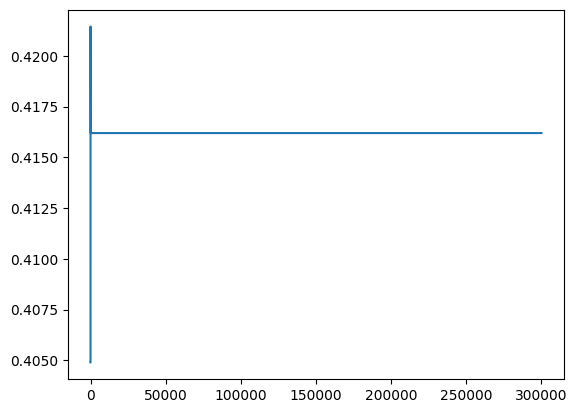

In [3]:
# We try to find optimal threshold t by simulated annealing

t = 0.4
max_step = 0.15*10**-2
t_values = []
for i in range(300000):
  rand_num = 2*random.random()-1
  #randomly sometimes multiplty it by up to 32
  rand_num *= 2**(random.random()*5)
  #randomly introduce larger jumps
  if (random.random()>0.85): rand_num *= 10**(random.random()*10//1)
  new_contender = min(t + max_step*rand_num,1)
  if mpwr(t,new_contender) < 0.5:
    if (i>299700): print(mpwr(t,new_contender))
    t = new_contender
  t_values.append(t)
  if (max_step > 10**-18): max_step *= 0.99
#plt.plot(t_values)
print(t)
print(max_step)
print(os(t))
plt.plot(t_values)
print(sum(t_values[-5000:])/5000)
print(os(sum(t_values[-5000:])/5000))